In [1]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
from material import open_material as om
from scipy.optimize import differential_evolution, minimize
import matplotlib.pyplot as plt

In [2]:
# open measurement file
scan_file1 = pd.read_csv('./measurement/R_5_blacktap.csv')
scan_file2 = pd.read_csv('./measurement/R_15_blacktap.csv')
scan_file3 = pd.read_csv('./measurement/R_30_blacktap.csv')
scan_file4 = pd.read_csv('./measurement/R_45_blacktap.csv')
scan5 = scan_file1['SCAN'].values
scan15 = scan_file2['SCAN'].values
scan30 = scan_file3['SCAN'].values
scan45 = scan_file4['SCAN'].values
# open material (LENS)
air = ml.Non_Dispersion(1)
SiO2_LENS = om('SiO2_LENS', 'Sellmeier') 
SiN_LENS = om('SiN_LENS', 'Sellmeier')
ITO_LENS = om('ITO_LENS', 'Sellmeier')
OC_LENS = om('OC_LENS', 'Material')
sodalime = om('sodalime', 'Material')
# open material (SemiLab)
SiO2 = om('SiO2', 'Sellmeier')
SiN = om('SiN', 'Sellmeier')
ITO = om('ITO', 'Sellmeier')
Acrylic = om('Acrylic', 'Sellmeier')
# target 
target_w = np.linspace(400, 700, 301)
target_R5 = scan5/100
target_R15 = scan15/100
target_R30 = scan30/100
target_R45 = scan45/100
# hypothesis
hypo_R5 = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(target_w, 5)

hypo_R15 = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(target_w, 15)

hypo_R30 = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(target_w, 30)

hypo_R45 = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(target_w, 45)

In [9]:
# fitting (LENS)
FOM_LS = lambda tht: sum(
    abs(target_R5-hypo_R5(tht))+
    abs(target_R15-hypo_R15(tht))+
    abs(target_R30-hypo_R30(tht))+
    abs(target_R45-hypo_R45(tht))
)
sol_LS = differential_evolution(
    FOM_LS, [(1500, 2200), (0, 12), (40, 60), (20, 26), (40, 60), (8, 12)]
)
print(sol_LS.x)
print(sol_LS.message)

[1649.40641442    3.18738418   42.0629977    20.           59.27585367
   10.15679974]
Optimization terminated successfully.


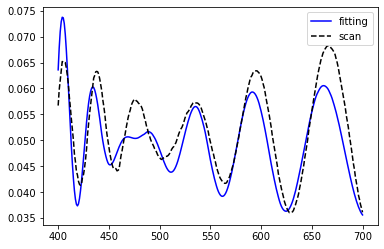

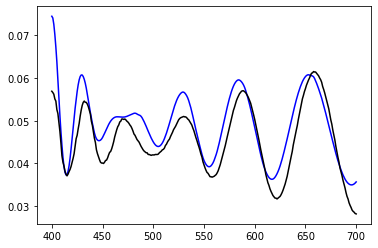

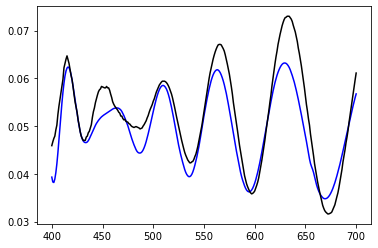

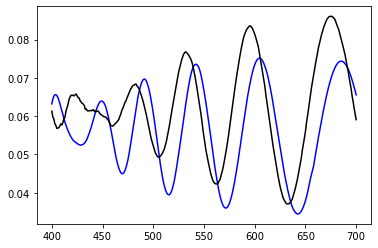

In [10]:
plt.plot(target_w, hypo_R5(sol_LS.x), '-b', label = 'fitting')
plt.plot(target_w, target_R5, '--k', label = 'scan')
plt.legend(loc = 'best')
plt.show()
plt.plot(target_w, hypo_R15(sol_LS.x), '-b', label = 'fitting')
plt.plot(target_w, target_R15, '-k', label = 'scan')
plt.show()
plt.plot(target_w, hypo_R30(sol_LS.x), '-b', label = 'fitting')
plt.plot(target_w, target_R30, '-k', label = 'scan')
plt.show()
plt.plot(target_w, hypo_R45(sol_LS.x), '-b', label = 'fitting')
plt.plot(target_w, target_R45, '-k', label = 'scan')
plt.show()